# Μέρος 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('wine-full.csv')
df['type'] = df['type'].map({'white': 0, 'red': 1})
df.head()


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [2]:
df=df.dropna()

In [3]:
inputs=df.drop(columns=['quality'])
targets=df['quality']

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs,targets,test_size=0.2,random_state=0)

**2**

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error
param_grid = {
    'n_estimators': [ 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}
model_rf=RandomForestRegressor(criterion="absolute_error",random_state=0)
grid_search_rf = GridSearchCV(
    estimator=model_rf,
    param_grid=param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1
)
grid_search_rf.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(criterion='absolute_error',
                                             random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 150]},
             verbose=2)

In [9]:
grid_search_rf.best_params_,grid_search_rf.best_score_

({'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150},
 0.48152358433580933)

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import numpy as np
# Define extended parameter grid
param_grid = {
    'alpha': np.logspace(-3,0,26),
    'max_iter': [1000, 5000, 10000],
    'tol': [1e-4, 1e-3, 1e-2],
}

# Create the Lasso model
model_lasso = linear_model.Lasso()

# Grid Search
grid_search = GridSearchCV(
    estimator=model_lasso,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit the model using grid search
grid_search.fit(x_train, y_train)

# Output results
print("Best Parameters:", grid_search.best_params_)
print("Best Negative MAE:", grid_search.best_score_)

# Predictions
y_pred = grid_search.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error on Test Set:", mae)

Fitting 5 folds for each of 234 candidates, totalling 1170 fits
Best Parameters: {'alpha': 0.001, 'max_iter': 1000, 'tol': 0.01}
Best Negative MAE: -0.5753114046323496
Mean Absolute Error on Test Set: 0.562538331971541


In [6]:
grid_search.best_params_

{'alpha': 0.001, 'max_iter': 1000, 'tol': 0.01}

In [7]:
grid_search.best_score_

-0.5753114046323496

In [5]:
from sklearn import linear_model
model_lasso=linear_model.Lasso(alpha=0.1)
model_lasso.fit(x_train,y_train)


Lasso(alpha=0.1)

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
y_pred=model_lasso.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"mae gia LinearLasso {mae}")
print(f"r2 gia LinearLasso {r2}")

mae gia LinearLasso 0.5964505867412746
r2 gia LinearLasso 0.21348029109745903


In [8]:
from sklearn.metrics import mean_absolute_error, r2_score
y_pred=model_rf.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"mae gia RandomForest {mae}")
print(f"r2 gia RandomFores {r2}")

mae gia RandomForest 0.44564578499613294
r2 gia RandomFores 0.4533083500994102


**3**

In [ ]:
import numpy as np
lassocoef=list(model_lasso.coef_)
features=list(inputs.columns)
lasso_dict=dict(zip(features,lassocoef))

In [ ]:
rfcoef=list(model_rf.feature_importances_)
rf_dict=dict(zip(features,rfcoef))

In [ ]:
lasso_dict=dict(sorted(lasso_dict.items(), key=lambda item: item[1],reverse=True))
lasso_dict

{'alcohol': 0.2787927470389054,
 'residual sugar': 0.010904589560880583,
 'free sulfur dioxide': 0.007420897357910347,
 'type': -0.0,
 'fixed acidity': -0.0,
 'volatile acidity': -0.0,
 'citric acid': 0.0,
 'chlorides': -0.0,
 'density': -0.0,
 'pH': -0.0,
 'sulphates': 0.0,
 'total sulfur dioxide': -0.0011672499375036975}

In [ ]:
rf_dict=dict(sorted(rf_dict.items(), key=lambda item: item[1],reverse=True))
rf_dict

{'alcohol': 0.5367164761520444,
 'volatile acidity': 0.29916277206951747,
 'density': 0.06324276934355355,
 'fixed acidity': 0.01667177658706482,
 'residual sugar': 0.01492872163969233,
 'chlorides': 0.01479170394327524,
 'sulphates': 0.013730527745578393,
 'free sulfur dioxide': 0.01164476000926241,
 'total sulfur dioxide': 0.01160863556531326,
 'pH': 0.010702695524095506,
 'citric acid': 0.006768122228449317,
 'type': 3.103919215329222e-05}

**4**

# Μέρος 2

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
import numpy as np

In [ ]:
lista=[5,5,5,5,5,5,5,5,5,5]
import random
images=[]
while(sum(lista)!=0):
  index=random.randint(0,len(y_test)-1)
  lista[int(y_test[index])]=lista[int(y_test[index])]-1
  images.append(x_test[index])


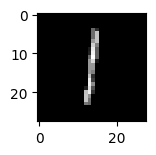

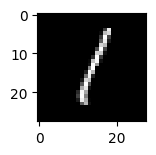

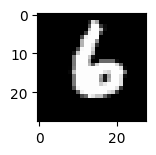

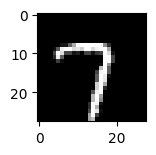

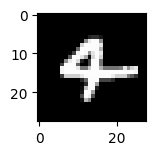

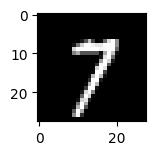

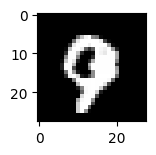

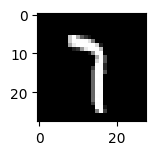

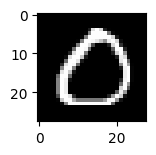

In [ ]:
for i in range(9):
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(images[i], cmap=pyplot.get_cmap('gray'))
  pyplot.show()

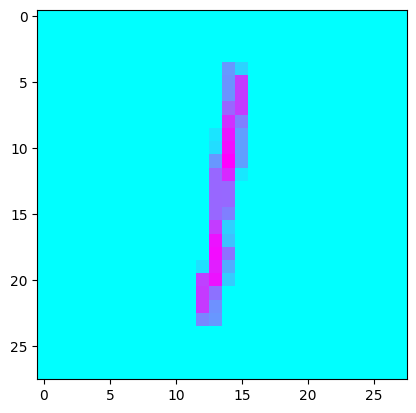

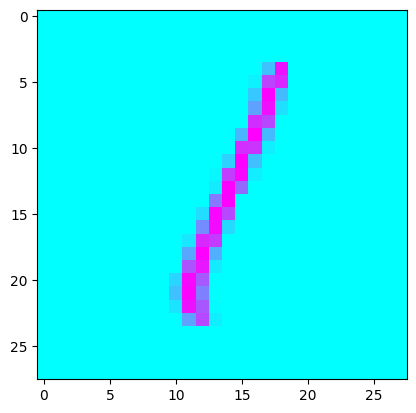

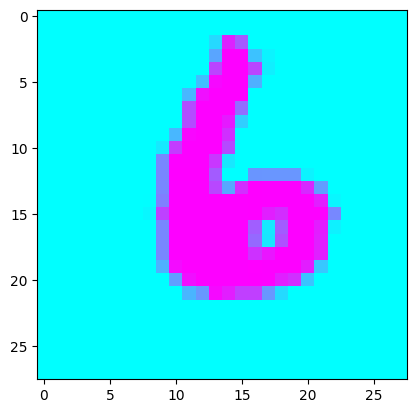

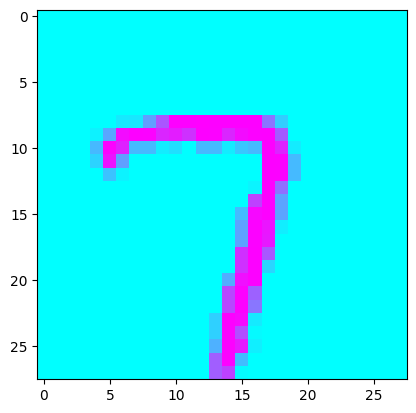

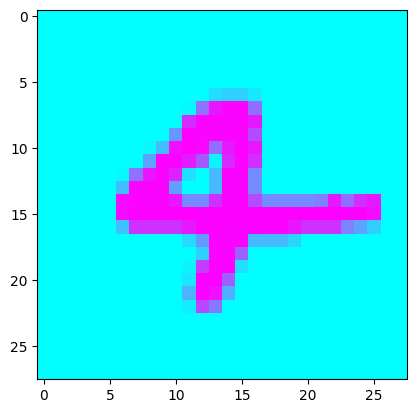

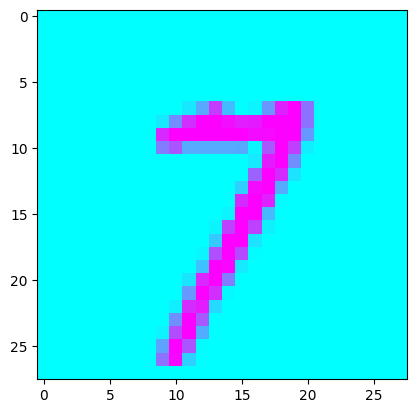

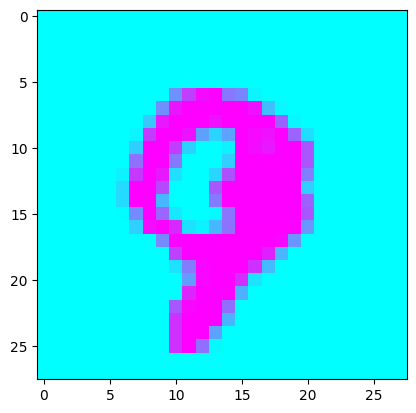

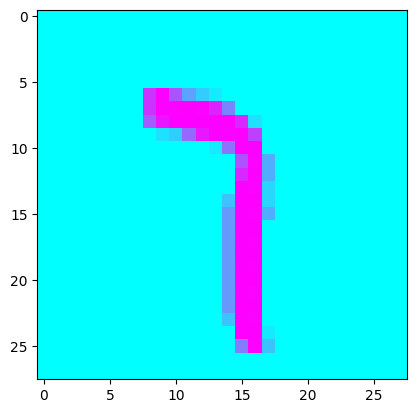

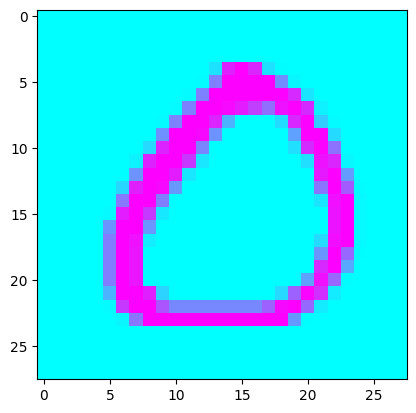

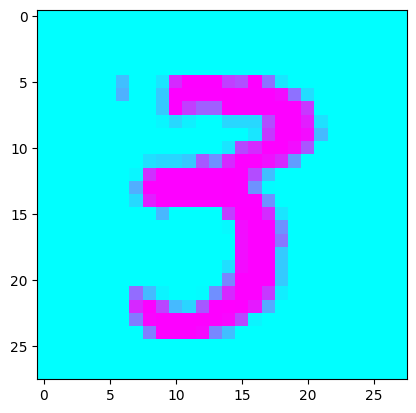

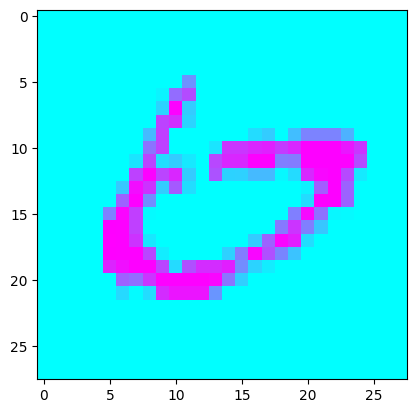

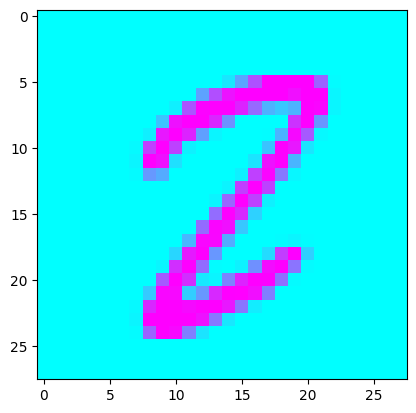

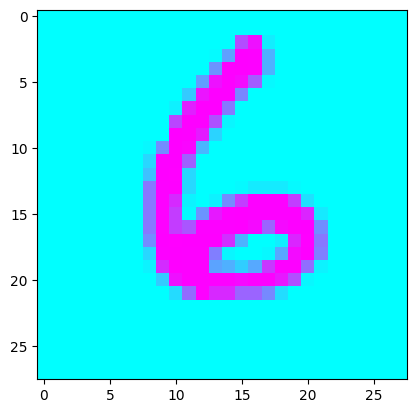

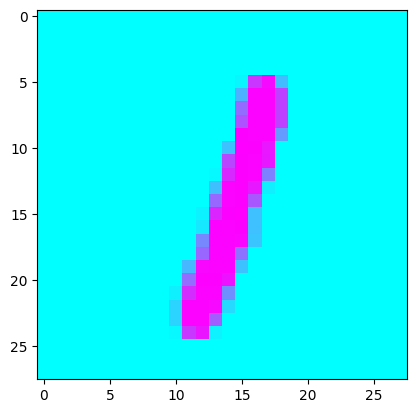

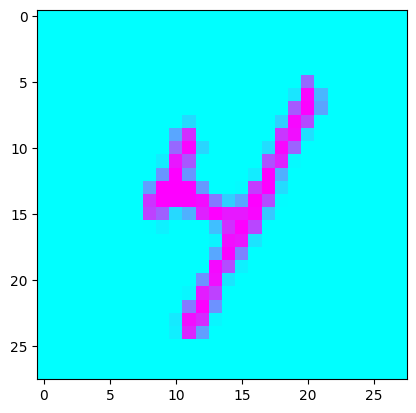

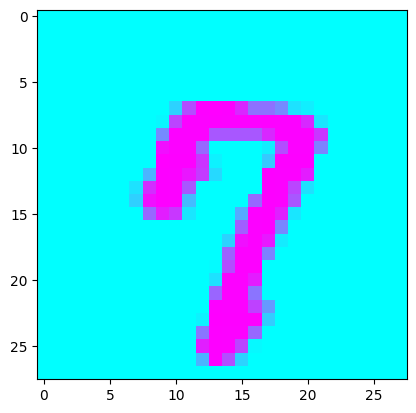

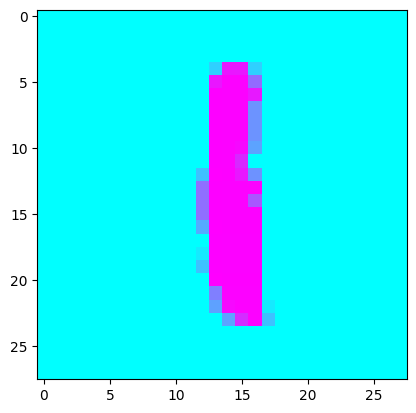

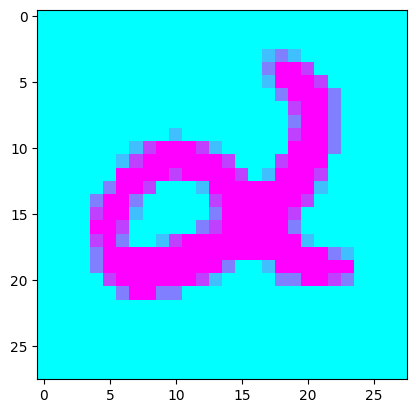

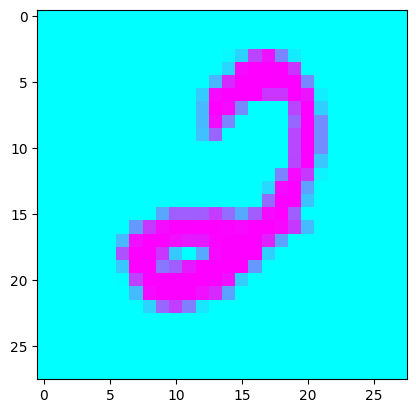

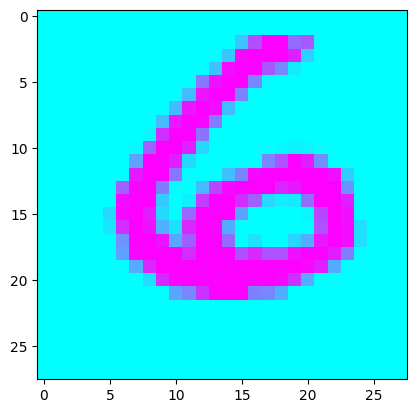

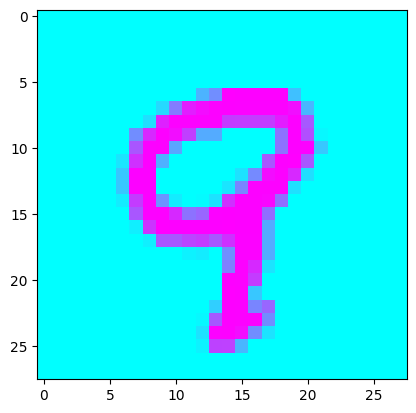

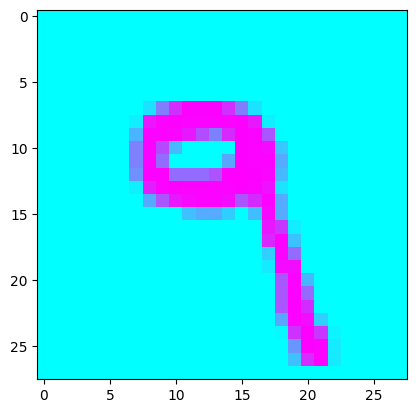

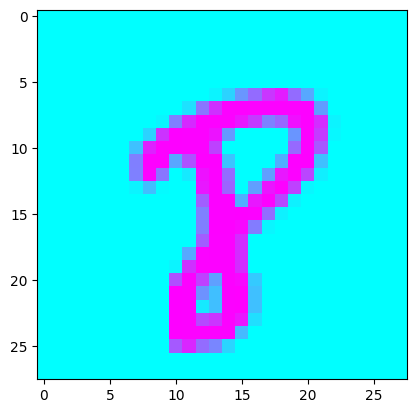

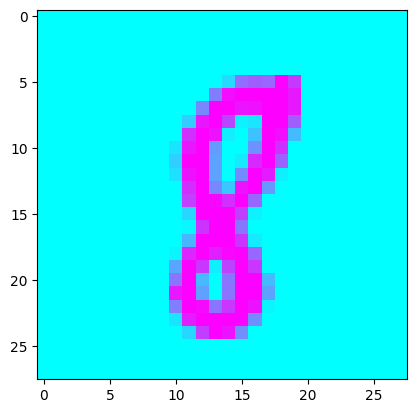

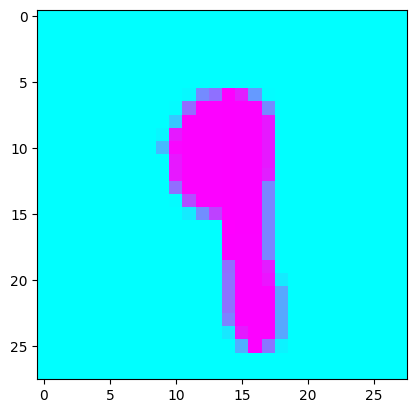

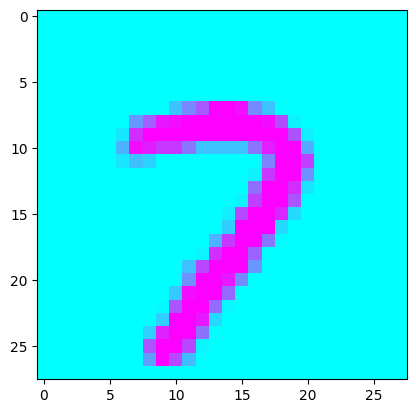

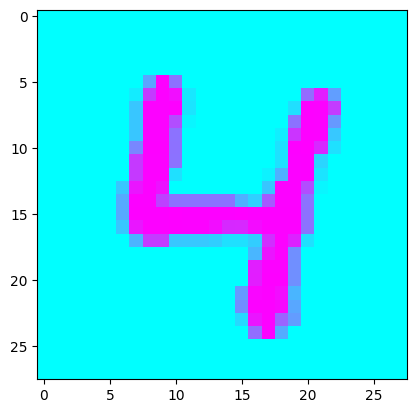

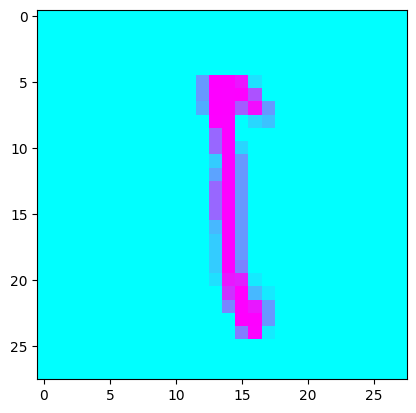

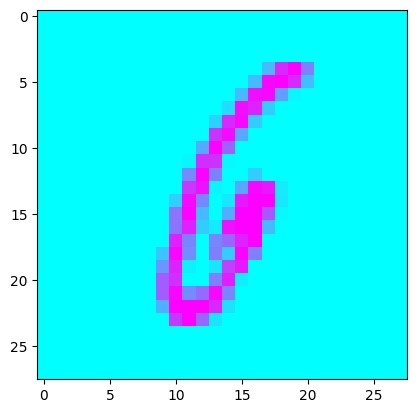

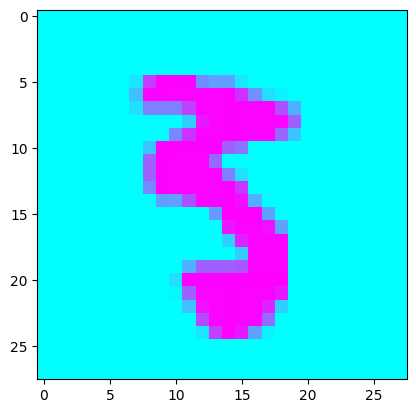

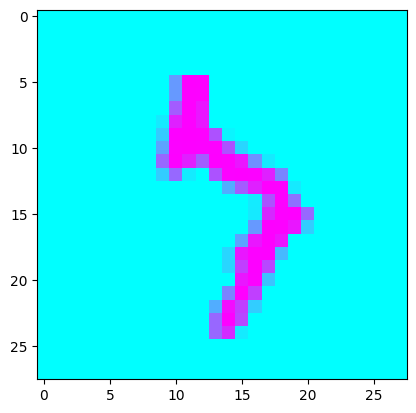

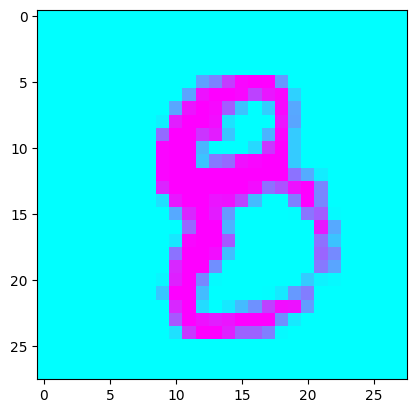

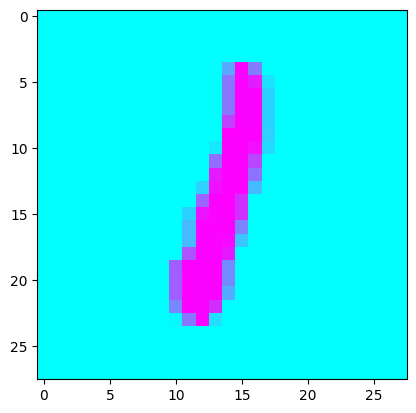

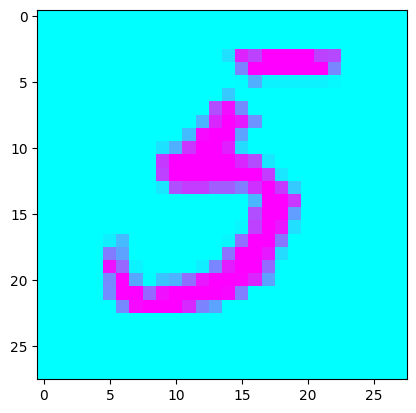

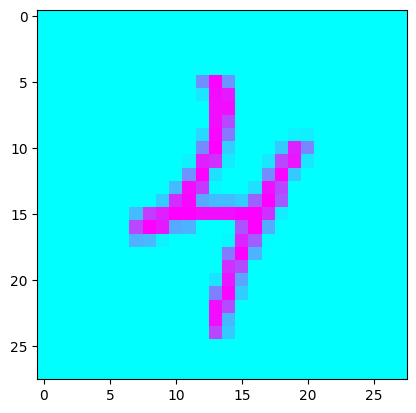

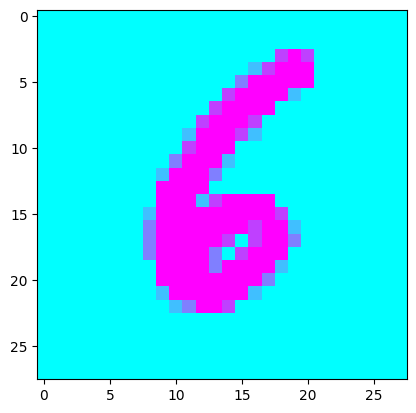

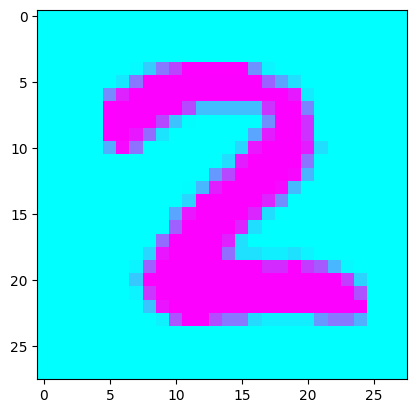

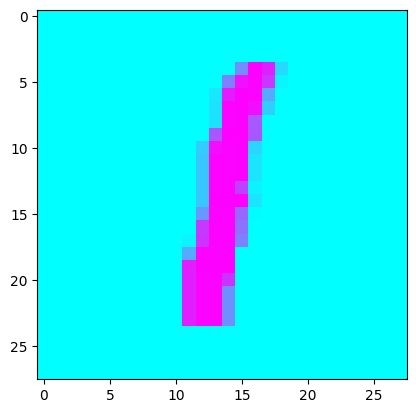

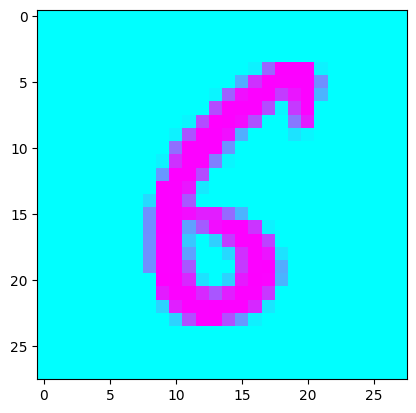

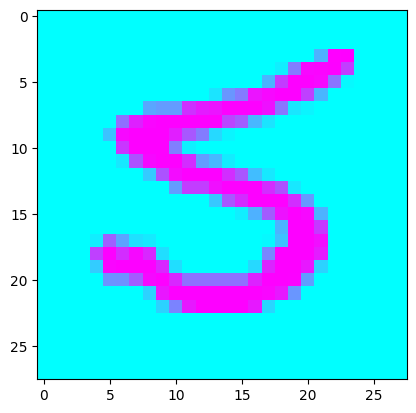

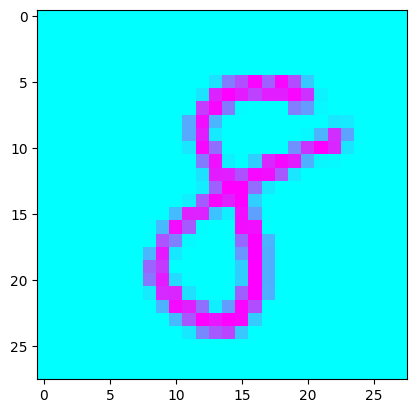

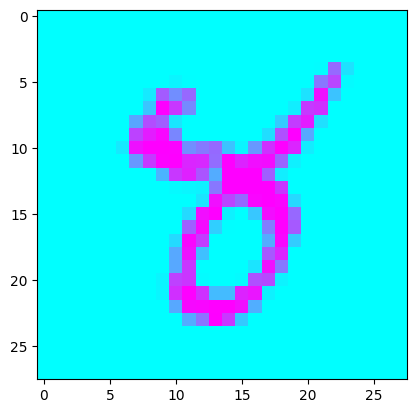

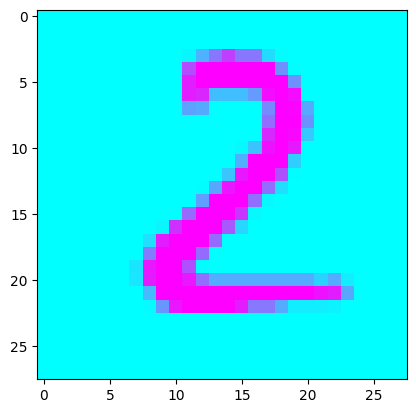

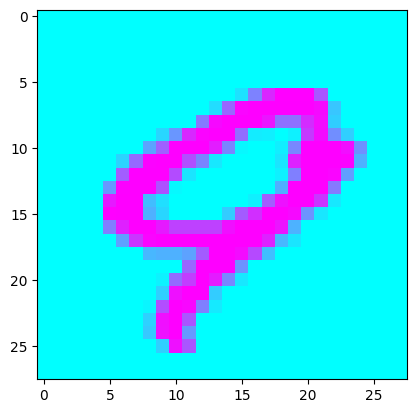

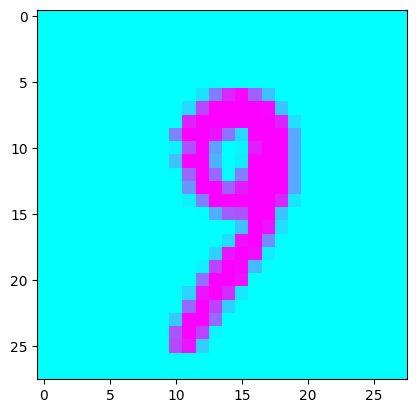

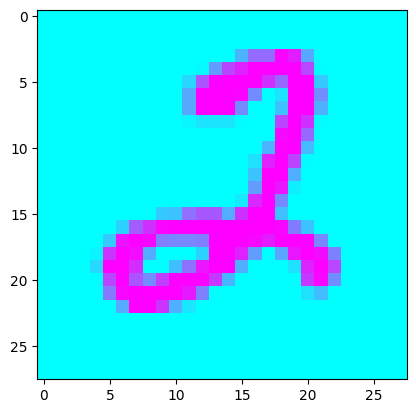

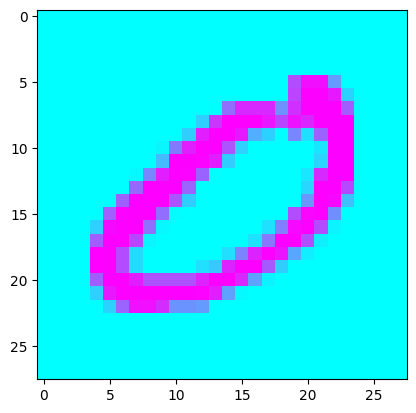

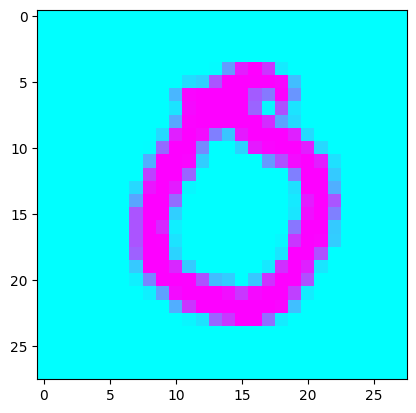

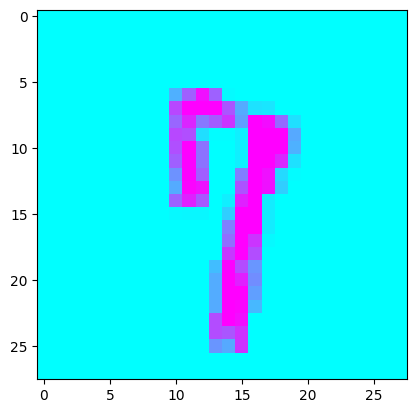

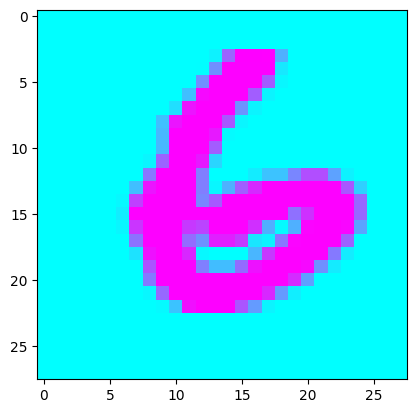

In [ ]:
from matplotlib import pyplot as plt

for image in images:
  pyplot.subplot()
  pyplot.imshow(image, cmap=pyplot.get_cmap('cool'))
  pyplot.show()


In [ ]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(x_train_flat, y_train)

KNeighborsClassifier(n_neighbors=50)

In [ ]:
y_pred = knn.predict(x_test_flat)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)


<Figure size 800x600 with 0 Axes>

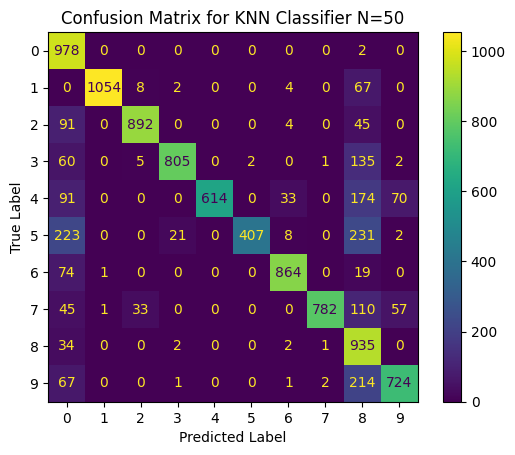

In [ ]:
from matplotlib import pyplot as plt
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(10)))
disp.plot()
plt.title("Confusion Matrix for KNN Classifier N=50")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print(f"accuracy: {accuracy:.2f}")
print(f"precision: {precision:.2f}")
print(f"recall: {recall:.2f}")
print(f"f1: {f1:.2f}")

accuracy: 0.81
precision: 0.88
recall: 0.80
f1: 0.81


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_flat, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(x_test_flat)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)


<Figure size 800x600 with 0 Axes>

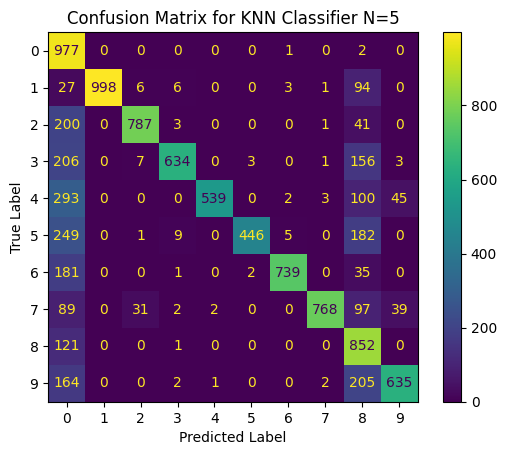

In [ ]:
from matplotlib import pyplot as plt
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(10)))
disp.plot()
plt.title("Confusion Matrix for KNN Classifier N=5")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print(f"accuracy: {accuracy:.2f}")
print(f"precision: {precision:.2f}")
print(f"recall: {recall:.2f}")
print(f"f1: {f1:.2f}")

accuracy: 0.74
precision: 0.86
recall: 0.73
f1: 0.75


In [ ]:
##############

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=300)
x_train_pca = pca.fit_transform(x_train_flat)
x_test_pca = pca.transform(x_test_flat)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(x_train_pca, y_train)

KNeighborsClassifier(n_neighbors=50)

In [ ]:
y_pred = knn.predict(x_test_pca)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)


<Figure size 800x600 with 0 Axes>

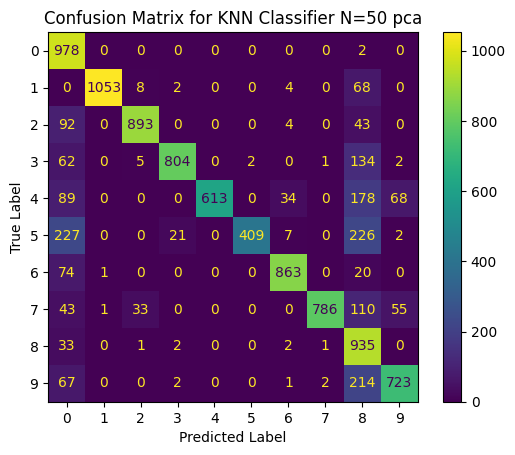

In [ ]:
from matplotlib import pyplot as plt
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(10)))
disp.plot()
plt.title("Confusion Matrix for KNN Classifier N=50 pca")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print(f"accuracy: {accuracy:.2f}")
print(f"precision: {precision:.2f}")
print(f"recall: {recall:.2f}")
print(f"f1: {f1:.2f}")

accuracy: 0.81
precision: 0.88
recall: 0.80
f1: 0.81


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)

x_lda_train = lda.fit_transform(x_train_flat, y_train)
x_lda_test = lda.fit_transform(x_test_flat, y_test)

In [ ]:
import plotly.graph_objects as go

import plotly.offline as py
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
data = [
    go.Scatter(
    x = x_lda[:,0],
    y = x_lda[:,1],
    mode = 'markers',
    showlegend = True,
    marker = dict(
        size = 8,
        color = y_train,
        colorscale ='Rainbow',
        showscale = False,
        opacity = 0.8,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        )
    )
)]

layout = go.Layout(
    title= 'Linear Discriminant Analysis (LDA)',
    hovermode= 'closest',
    xaxis= dict(
         title= 'First Linear Discriminant',
        ticklen= 8,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Second Linear Discriminant',
        ticklen= 8,
        gridwidth= 2,
    ),
    showlegend= False
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='lda_plot')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(x_lda_train, y_train)
y_pred = knn.predict(x_lda_test)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print(f"accuracy: {accuracy:.2f}")
print(f"precision: {precision:.2f}")
print(f"recall: {recall:.2f}")
print(f"f1: {f1:.2f}")

accuracy: 0.39
precision: 0.36
recall: 0.38
f1: 0.35


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=int((len(x_train))**(1/2)))
knn.fit(x_lda_train, y_train)
y_pred = knn.predict(x_lda_test)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print(f"accuracy: {accuracy:.2f}")
print(f"precision: {precision:.2f}")
print(f"recall: {recall:.2f}")
print(f"f1: {f1:.2f}")

accuracy: 0.41
precision: 0.38
recall: 0.40
f1: 0.36


TypeError: unsupported operand type(s) for ^: 'int' and 'float'